#The Birthday Problem
Finding the probability that out of n randomly chosen people, at least 2 will share a birthday
https://en.wikipedia.org/wiki/Birthday_problem

In [25]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
birthdays = pd.DataFrame(np.empty([365,2]), columns = ['k','probability'], index = range(1,366))
birthdays['k'] = birthdays.index

In [3]:
def probability_of_shared_bday(k):
    end_point = 366 - k
    ratio = 1
    for i in range(end_point, 366):
        ratio *= i / 365
    probability_of_no_match = (1 - ratio)
    return probability_of_no_match

In [4]:
# create a theoretical probability distribution
birthdays['probability'] = birthdays['k'].apply(probability_of_shared_bday)

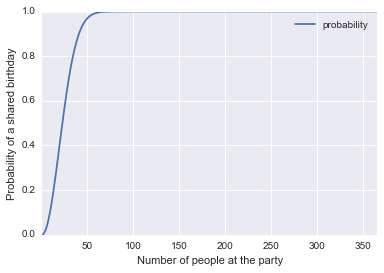

In [5]:
#Probability distribution plot for parties of increasing sizes
birthdays.plot(x= 'k',y = 'probability')
plt.xlabel("Number of people at the party")
plt.ylabel("Probability of a shared birthday")

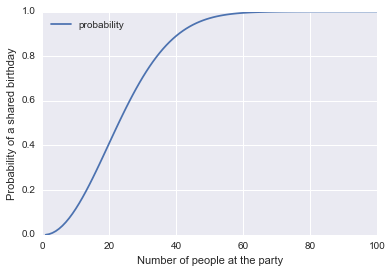

In [7]:
#The same plot as above but with reduced x axes limits
birthdays.plot(x= 'k',y = 'probability')
plt.xlim(0,100)
plt.xlabel("Number of people at the party")
plt.ylabel("Probability of a shared birthday")

###Testing this out for real with my facebook friends' birthdays
I first exported the calendar of all my facebook friends' birthdays to .ics. Then I used python to clean up the data so that I just had the dates in mm/dd format. I have 340 fb friends.

In [11]:
fb_birthdays = pd.read_csv("Friends' birthdays.ics")
fb_birthdays.columns = ['ical']
#just keep rows with dates
criterion = fb_birthdays['ical'].map(lambda x: x.startswith('DTEND;VALUE=DATE:'))
fb_birthdays = fb_birthdays.cal[criterion]
#just keep mm/dd
fb_birthdays = fb_birthdays.apply(lambda x: x[21:])
#reset index
fb_birthdays.index= range(340)
#turn into a dataframe
fb_birthdays_df = pd.DataFrame(fb_birthdays)
fb_birthdays_df['date'] = fb_birthdays.apply(lambda x: x[:2]+'/'+x[-2:])

In [12]:
fb_birthdays_df.head()

,cal,date
0,0608,06/08
1,0715,07/15
2,1215,12/15
3,0824,08/24
4,0828,08/28


In [13]:
#get rid of pesky leap years that make things more complicated
fb_birthdays_df = fb_birthdays_df[fb_birthdays_df['date']!='02/29']
fb_birthdays_df[fb_birthdays_df['date'] == '02/29']

,cal,date


In [16]:
#convert the 'date' column into 'datetime' objects
fb_birthdays_df['datetime'] = fb_birthdays_df['date'].apply(lambda x: datetime.datetime(2015,int(x[:2]),int(x[-2:])))
fb_birthdays_df.head()

,cal,date,datetime
0,0608,06/08,2015-06-08
1,0715,07/15,2015-07-15
2,1215,12/15,2015-12-15
3,0824,08/24,2015-08-24
4,0828,08/28,2015-08-28


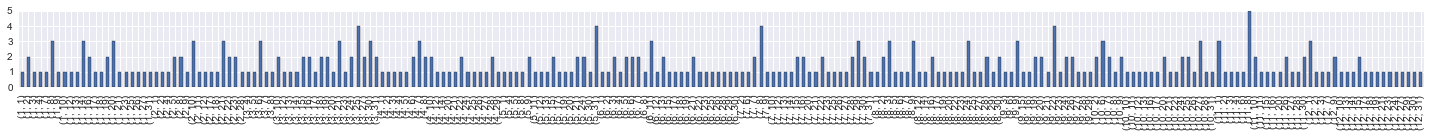

In [36]:
fig = plt.figure(figsize=(20, 2))
ax = fb_birthdays_df.datetime.groupby([fb_birthdays_df.datetime.dt.month,fb_birthdays_df.datetime.dt.day]).count().plot(kind = 'bar')
plt.tight_layout()
fig.savefig("birthday_hist", pad_inches = 0.5)


In [21]:
def proportion_shared_bdays(k):
    parties_with_shared_bday = 0
    for i in range(1000):
        random_indexes = np.random.randint(0,339,k)
        party = fb_birthdays_df['datetime'][random_indexes]
        if sum(party.duplicated())>0:
            parties_with_shared_bday +=1
    proportion_shared_bdays = parties_with_shared_bday/1000
    return proportion_shared_bdays

In [22]:
fb_probabilities = pd.DataFrame(np.empty([365,2]), columns = ['k','probability'], index = range(1,366))
fb_probabilities['k'] = fb_probabilities.index
fb_probabilities['probability'] = fb_probabilities['k'].apply(lambda x:proportion_shared_bdays(x))

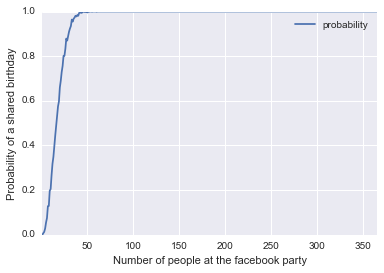

In [44]:
fb_probabilities.plot(x= 'k',y = 'probability')
plt.xlabel("Number of people at the facebook party")
plt.ylabel("Probability of a shared birthday")
#plt.savefig("fb_probabilities")

In [42]:
proportion_shared_bdays(23)

0.767

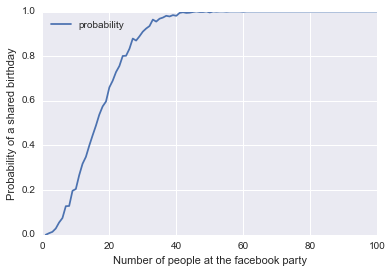

In [45]:
fb_probabilities.plot(x= 'k',y = 'probability')
plt.xlim(0,100)
plt.xlabel("Number of people at the facebook party")
plt.ylabel("Probability of a shared birthday")